In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
data = pd.read_csv('abalone.csv')

In [2]:
from sklearn.model_selection import train_test_split
X = data.drop(['Rings'],axis=1)
y = data.Rings
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.75,train_size=0.25,random_state=0)
num_cols = [cols for cols in X_train.columns if X_train[cols].dtype in ('int64','float64')]
cat_cols = [cols for cols in X_train.columns if X_train[cols].dtype=='object']

In [5]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(handle_unknown='ignore')
num_X_train = X_train.drop(cat_cols,axis=1)
num_X_valid = X_valid.drop(cat_cols,axis=1)
num_X_train

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
4132,0.585,0.470,0.170,0.9850,0.3695,0.2395,0.3150
1937,0.625,0.515,0.170,1.3310,0.5725,0.3005,0.3610
1321,0.560,0.425,0.145,0.6880,0.3095,0.1305,0.2165
1125,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165
3788,0.630,0.475,0.150,1.0720,0.4330,0.2975,0.3150
...,...,...,...,...,...,...,...
1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535
2607,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185


In [11]:
model = keras.Sequential([
    layers.Dense(1024,activation='relu',input_shape=[7]),
    layers.Dense(1024,activation='relu'),
    layers.Dense(1024,activation='relu'),
    layers.Dense(1)
])

<AxesSubplot:>

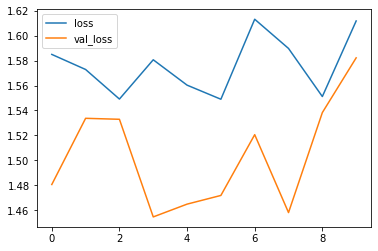

In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'mae',
)
final_model = model.fit(
    num_X_train,y_train,
    epochs=10,
    validation_data=(num_X_valid,y_valid),
    verbose=0,
)
history = pd.DataFrame(final_model.history)
history.loc[:,['loss','val_loss']].plot()